In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
batchsize = 128
lr = 3e-4
z_dim = 100
Epoch = 64
img_channel = 1

In [15]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(transforms.Normalize([0.5], [0.5])) 

SyntaxError: unexpected EOF while parsing (1499926000.py, line 1)

In [50]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5), (0.5,0.5))])

In [16]:
transform = transforms.Compose([
	transforms.ToTensor(), 
	transforms.Normalize([0.5], [0.5])
])


In [17]:
dataset = datasets.MNIST(root="dataset/", transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size = batchsize, shuffle = True)

In [18]:
class Disc(nn.Module):
    def __init__(self, img_channel):
        super().__init__()
        # (batchsize, 1 , 28, 28)
        self.c1 = nn.Conv2d(img_channel, 64, 4, 2, 1)
        self.r1 = nn.LeakyReLU(0.2)
        self.c2 = nn.Conv2d(64, 128, 4, 2, 1)           
        self.r2 = nn.LeakyReLU(0.2)
        self.c3 = nn.Conv2d(128, 256, 4, 2, 1)         
        self.r3 = nn.LeakyReLU(0.2)
        self.c4 = nn.Conv2d(256, 1, 4, 2, 1)           
        self.r4 = nn.Sigmoid()
        
    def forward(self,x):
        x = self.c1(x)
        x = self.r1(x)
        x = self.c2(x)
        x = self.r2(x)
        x = self.c3(x)
        x = self.r3(x)
        x = self.c4(x)
        x = self.r4(x)
        
        return x

In [19]:
class Gen(nn.Module):
    def __init__(self,z_dim):
        super().__init__()
        # (batchsize, z_dim, 1, 1)
        self.tc1 = nn.ConvTranspose2d(z_dim, 256, 3, 1, 0)
        self.bn1 = nn.BatchNorm2d(256, 0.8)
        self.r1 = nn.ReLU()
        self.tc2 = nn.ConvTranspose2d(256, 128, 5, 2, 1)
        self.bn2 = nn.BatchNorm2d(128, 0.8)
        self.r2 = nn.ReLU()
        self.tc3 = nn.ConvTranspose2d(128, 64, 4, 2, 1)
        self.bn3 = nn.BatchNorm2d(64, 0.8)
        self.r3 = nn.ReLU()
        self.tc4 = nn.ConvTranspose2d(64, 1, 4, 2, 1)
        self.r4 = nn.Tanh()
        
    def forward(self, x):
        
        x = self.tc1(x)
        x = self.bn1(x)
        x = self.r1(x)
        x = self.tc2(x)
        x = self.bn2(x)
        x = self.r2(x)
        x = self.tc3(x)
        x = self.bn3(x)
        x = self.r3(x)
        x = self.tc4(x)
        x = self.r4(x)
        
        return x

In [20]:
disc = Disc(img_channel)
gen = Gen(z_dim)
opt_disc = optim.Adam(disc.parameters(), lr = lr)
opt_gen = optim.Adam(gen.parameters(), lr = lr)
criterion = nn.BCELoss()


In [21]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [22]:
device

'cpu'

In [23]:
disc = Disc(img_channel).to(device)
gen = Gen(z_dim).to(device)

In [24]:
noise = torch.randn(batchsize, z_dim, 1, 1).to(device)

In [25]:
def train():
    for epoch in range(Epoch):
        s
            
        for index, (data, _) in enumerate(dataloader):
        # 传真实数据到gpu
            real_data = data.to(device)
            # 传入噪声生成假图片
            fake_img = gen(noise)
            # 真实图片传入判别器，判别为1
            real = disc(real_data).view(-1)
            # 假图传入判别器，判别为0
            fake = disc(fake_img).view(-1)
            # 损失
            real_loss = criterion(real, torch.ones_like(real))
            fake_loss = criterion(fake, torch.zeros_like(fake))
            D_loss = (real_loss + fake_loss) / 2
            G_loss = criterion(fake, torch.zeros_like(fake))
            # 梯度清0
            disc.zero_grad()
            gen.zero_grad()
            # 反向传播
            D_loss.backward(retain_graph=True)
            G_loss.backward(retain_graph=True)
            # 梯度更新
            opt_disc.step()
            opt_gen.step()
            # 打印损失
            if index == 0:
                print(f'EPOCH:{epoch + 1 } G_LOSS：{G_loss} D_LOSS:{D_loss}')
            # 可视化图片
                with torch.no_grad():
                    img = fake_img.reshape(-1, 28, 28, 1).cpu().detach().numpy()
                    plt.imshow(img[0])
                    plt.show()




In [26]:
dataloader

EPOCH:1 G_LOSS：0.683354377746582 D_LOSS:0.6934859156608582


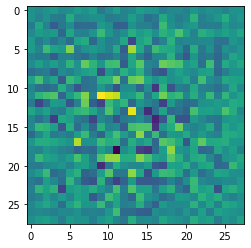

In [ ]:
train()